In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv("co2.csv")

In [84]:
df=df[(df['Vehicle Class']=='COMPACT') | (df['Vehicle Class']=='PICKUP TRUCK - STANDARD')]

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

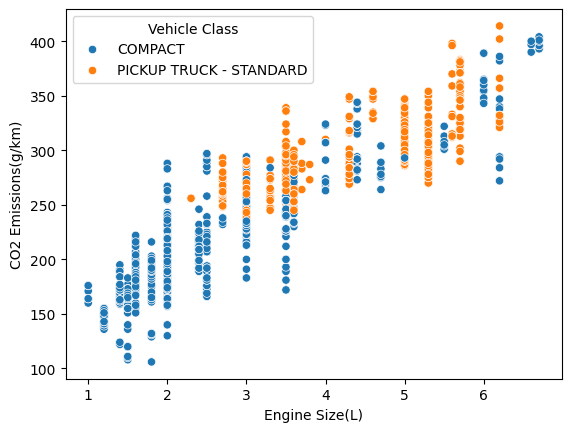

In [85]:
sns.scatterplot(x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)'], hue=df['Vehicle Class'])

In [86]:
df['Vehicle Class']=df['Vehicle Class'].map({'COMPACT':0, 'PICKUP TRUCK - STANDARD':1})

In [87]:
df = df[['Vehicle Class', 'Engine Size(L)', 'CO2 Emissions(g/km)']]

In [88]:
df.sample(10)

,Vehicle Class,Engine Size(L),CO2 Emissions(g/km)
1574,0,1.5,120
6155,0,4.0,263
6719,1,5.3,296
2283,0,3.0,231
2185,0,2.0,205
4322,0,1.5,168
1200,0,3.0,237
3689,0,2.0,185
7287,0,6.6,400
5766,1,5.0,308


In [89]:
df1=df

In [90]:
split_idx = int(0.7 * len(df))
print(split_idx)
df= df.iloc[:split_idx,:]
test = df1.iloc[split_idx:,:]


1092


In [91]:
arr=np.array(df.drop(['Vehicle Class'], axis=1))

In [92]:
y=df["Vehicle Class"]
y=np.array(y)

def compute_gradient(X, y, w, b):
  m,n=X.shape
  dj_dw = np.zeros((n,))
  dj_dw = np.array(dj_dw, dtype=np.float64)
  w = np.array(w, dtype=np.float64)
  dj_db=0.
  for i in range(m):
    z=np.dot(w,X[i])+b
    err=(1/(1+np.exp(z)))-y[i]
    for j in range(n):
      dj_dw[j]=dj_dw[j]+err*X[i, j]
    dj_db=dj_db+err

  dj_dw=dj_dw/m
  dj_db=dj_db/m
  return dj_dw, dj_db


In [108]:
def gradient_descent():
  m,n=arr.shape
  w=np.zeros((n,))
  w = np.array(w, dtype=np.float64)
  b=0
  for i in range(10000):
    dj_dw, dj_db=compute_gradient(arr, y, w, b)
    w=w-0.0005*dj_dw
    b=b-0.0005*dj_db

  return w, b


In [109]:
W, B=gradient_descent()

In [110]:
print(W)
print(B)

[  -8.73773318 -760.15550659]
-3.479586710591852


In [111]:
test.head()

,Vehicle Class,Engine Size(L),CO2 Emissions(g/km)
4891,0,1.6,173
4920,0,3.5,200
4926,0,2.0,200
4927,0,2.0,221
4947,0,2.0,186


In [112]:
arr1=np.array(test.drop(['Vehicle Class'], axis=1))

In [113]:
m,n=arr1.shape

In [114]:
print(m)

468


In [115]:
y_pred=np.zeros((m,))

In [116]:
len(y_pred)

468

In [117]:
from scipy.special import expit
for i in range (m):
  z=np.dot(W,arr1[i])+B
  #y_pred[i]=1/(1+np.exp(-z))
  y_pred[i] = expit(z)


In [118]:
y_test=np.array(test['Vehicle Class'])
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 55.98%
